# 1. Fundamental Theorem of Calculus
All across the field of Machine Learning calculus is utilized. In the world of Deep Learning, optimization via backpropagation reigns supreme, and it is often easy to end up either letting the computer handle all of the derivation and integration for you, or to forget the underlying intuition of what the equations mean in english. 

<br>
This notebook was designed with the idea of being a fun review that will create a deeper understanding of a fundamental theorem that is seen in nearly every corner of Machine Learning. We will be exploring the relationship between **distance** and **velocity** since they are easily understood based on every day experiences. 

<br>
Before we begin, however, I want you to try and do the following two things:
> 1. Explain in english, what a derivative is.
2. Then explain what an integral is...and what does it have to do with area...?

Take 5 minutes to try this! The reason it is a valuable exercise is because often times when learning math you may either never fully understand the intuition and resort to rote memorization, or over the years it has been lost as software has been able to implement the mechanical calculations for you. If this was the case for you then I think you will find this walkthrough very enjoyable, and you may come away with a greater appreciation for just how beautiful calculus is! 

## 1.0 Prerequisite: Input vs. Response
Before we can begin we need to quickly review what exactly a function is. Forget $x$s and $y$s for the moment, forget equations that have been rotely memorized. What is a function, and why would we even need one? 

Well let's consider the real world scenario where you are trying to buy a car. Let's say you know that the car was made in 2010 and it has 100,000 miles on it. Intuitively, and without even realizing it, you create a function that maps those features of the car, to what you feel it is worth. Maybe you think that car is worth 4,000 dollars. That means that in some way you decided in your head that there is a function, which we can call $Car \;Price \;Estimator$:

$$Function = Car \; Price \; Estimator $$

And it takes two inputs, the year it was made and the number of miles on it:

$$Car \; Price \; Estimator (Year \; made, number \; of \; miles)$$

And that yielded an output, of 4,000 dollars:

$$Car \; Price \; Estimator (2010, 100000 \;miles) = 4000 \; dollars$$

This can be seen visually as well:

<br>
<img src="images/function.png">
<br>

Think of how often that may happen-a situation where you take in information about the world around you, and you then say "hmmm there is definitely a relationship between these two things". Well, in mathematical terms that relationship is a function. If you are wondering, "why do we need to turn a normal everyday relationship into a mathematical equation?", well, the simplest answer is because it allows you to do very powerful things. 

As a motivator for why functions are so powerful I will leave you with this list of what they can and currently do:
1. We can create functions that define the relationship between certain images of cancer cells and whether or not the patient actually has cancer
2. We can create functions that take in thousands of pixels associated with image and then determine what is in that image
3. We can create functions that predict given a certain population and its characteristics, how quickly will a disease spread. 

Okay, so with that in mind I want us to remember that a function can be thought of as a map of a relationship. 

---

## 1.1 Distance 
With our prerequisites out of the way, let's start by thinking about the concept of **distance**. The units (meters, miles, kilometers, inches, etc) do not particularly matter and in reality can just get in the way, so we will leave them unitless for now. For now we can just think about distance as how far you travel as a function of **time**. We will define our distance function for this walkthrough to be: 

$$Distance = s(t) = 4t^2 - \frac{1}{3}t^3$$ 

Note that the reason I am using the variable $s$ to represent the distance function is to prevent confusion with derivative notation that will be introduced shortly. With that said, let's get a visualization of this function.

In [50]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc, animation
import seaborn as sns

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")

%matplotlib notebook
from IPython.display import HTML, Image

""" ------- Initial Constants -------"""
lower_initial = 0
upper_initial = 8
length = 2000

In [51]:
""" ------ Distance Function ------ """
def distance(x):
  return 4 * np.power(x, 2) - (1 / 3) * np.power(x, 3)

<IPython.core.display.Javascript object>


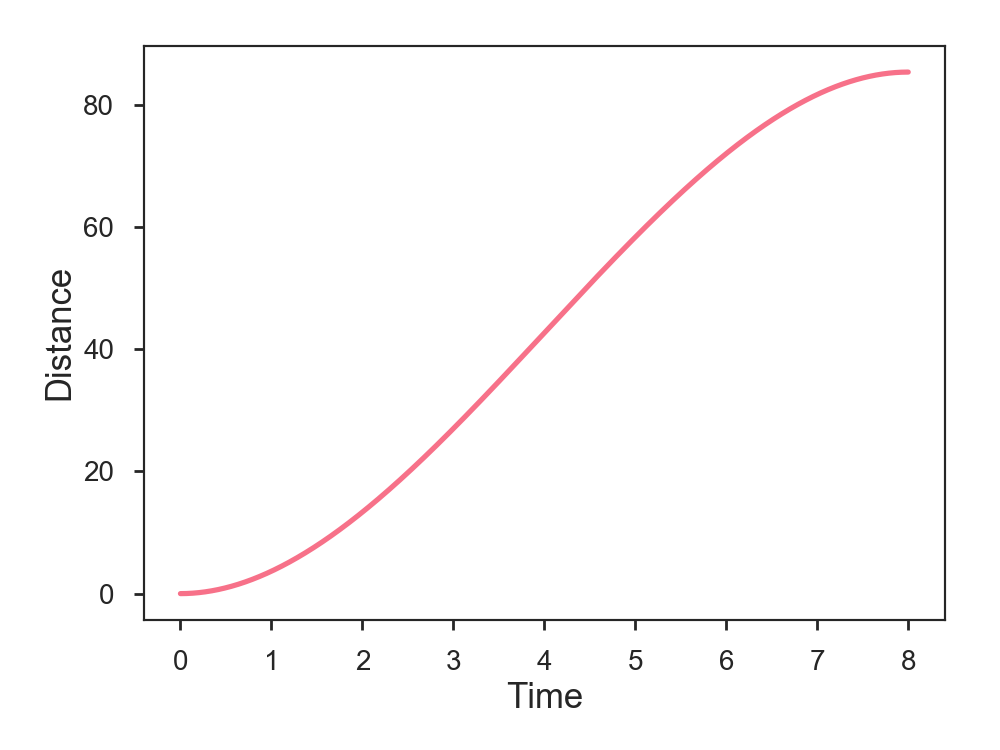

In [52]:
plt.ioff() 
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Distance', fontsize=20)
plt.tight_layout()

x = np.linspace(lower_initial, upper_initial, length)
y = distance(x)
ax1.plot(x, y, lw=3)
plt.show()

Awesome. So we can see that the curve representing $s(t)$ is steepest when time is equal to 4, and at the ends (0 and 8) it becomes flat. Of course the steepness that we are talking about is known as **slope**, or **rate of change**. When time is equal to 4 the rate of change is high, meanwhile when time is equal to 0 or 8 the rate of change is low. 

Now before we bring in the concept of a derivative, let's look at an animation of this curve being created. What we want to focus on is what happens to our **distance** at time $t$ when we change $t$ slightly? 

In [57]:
plt.ioff()                                              # Turn off interactive plotting
fig, (ax1, ax2) = plt.subplots(2, figsize=(5, 7))       # Create figure and axis object   
ax1.set_ylabel('Distance', fontsize=20)
ax2.set_ylabel('Distance', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
plt.tight_layout()
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance
d2, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, velocity
  d.set_data(x, dist)                               # Set our data
  d2.set_data(x, dist)                               # Set our data
  for i in range(0,4):
    ax2.axvline(x=i*2, ymax=100, color="lightblue")

def init_distance():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 100) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 100) 
  return d, d2

""" Define steps and create animation object """
step = 0.05
steps = np.arange(0, 8, step)

# html_video = HTML(FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
#                                 interval=50, blit=True).to_html5_video())
rc('animation', html='html5')
video = animation.FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
                                interval=100, blit=True, repeat_delay=100)
video

In [55]:
video.save('testgif.gif', writer='imagemagick', fps=200)

In [56]:
Image(url='testgif.gif')

<img src="testgif.gif">

We can see two animations of the same curve above. They are each plotting distance as a function of time, as described by our original equation. The second animation has simply broken the plot down into intervals of 2 seconds. 

Now, watch as as the $s(t)$ curve is drawn and play close attention specifically to how $s(t)$ responds to changes in $t$ over intervals of 2 seconds. To make this more concrete, let's break this down into intervals. 

<br>
**Interval 1: $[time =0, time =2]$** <br>
Take the slider that controls the animation and move it from 0 to 2 seconds manually. We can define our interval as:

$$interval_1 = t_2 - t_0 = 2 \; seconds $$

How much of a change in distance is there during that 2 second interval? Well, we go from a distance of 0 to a distance of approximately 16.

$$change \; in \; distance \; during \; interval_1 = 16 - 0 = 16$$

(Note that I have not calculated the specific change in distance here purposefully; I am simply using the plot in order to keep this understanding visual, mechanical calculations will come soon enough). 

So, for $interval_1$ we can say that our change in $t$ of 2 seconds, caused a response in the distance of 16. 

<br>
**Interval 2: $[time =2, time =4]$** <br>
If we then look at the next interval, from $t = 2$ to $t =4$: 

$$interval_2 = t_4 - t_2 = 2 \; seconds $$

We can see that our increase is:

$$s(t =4) - s(t = 2) = 41 - 16 = 25  $$ 

So, in this 2 second interval, $s(t)$ increased by approximately 25. 

---
<br>
### 1.1.1 Key Idea 
What we have seen first hand is that during different 2 second intervals of $t$, our distance will change more quickly. From $t=0$  to $t=2$ we increased by 16, but from $t=2$ to $t=4$ we increased by 25. Both intervals were the same magnitude, but the amount the distance increased was larger in the second interval. What we are uncovering is the **slope** or **rate of change** of the distance function will change at different values of $t$. In other words:
> The distance function is more **sensitive** to changes in time, depending on where our time is at to begin with.

Now, and here is the cool part. What does this slope actually represent? Well, in this case the slop of the distance function is **velocity**! This should make sense if we think about it, but looking at the equation may help:

<br>
$$slope = \frac{rise}{run} = \frac{change \; in \; distance}{change \; in \; time} = \frac{miles}{hour}$$

We have all seen the spedometer on a car telling you your velocity in miles per hour-well the slope of our distance function is giving back the same thing. 

---
<br>
### 1.1.2 The Derivative of Distance: Part 1
Let's recap where we are at so far. At this point we have looked at how **distance** changes as a function of **time**, based on our defined function:

$$Distance = s(t) = 4x^2 - \frac{1}{3}x^3$$ 

We then discovered that the slope of our **distance** function is actually **velocity**. We came upon the concept of a function's **sensitivity** to a change in its input, and how depending on where the change is made a greater response will be seen. This is the base for which we will frame our next concept, the **derivative**. 

We saw how the plot was drawn in the animation above, and we also determined that over different intervals of time $t$, a change in $t$ of 2 seconds would cause a **greater** or **smaller** change in the output, our distance. 

Now, let's take that last idea one step further. What if we looked at how our distance function changed over smaller intervals of $t$. Let's try this out with 1 second intervals, and 0.5 second intervals. 

In [9]:
plt.ioff()                                              # Turn off interactive plotting
fig, (ax1, ax2) = plt.subplots(2, figsize=(5, 7))       # Create figure and axis object   
ax1.set_ylabel('Distance', fontsize=20)
ax2.set_ylabel('Distance', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
ax1.set_title('Interval of 1s', fontsize=20)
ax2.set_title('Interval of 0.5s', fontsize=20)
plt.tight_layout()
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance
d2, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, velocity
  d.set_data(x, dist)                               # Set our data
  d2.set_data(x, dist)                               # Set our data
  for i in range (0,8):
    ax1.axvline(x=i, ymax=100, color="lightblue") 
  for j in range(0,16):
    ax2.axvline(x=j*0.5, ymax=100, color="lightblue")
  
def init_distance():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 100) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 100) 
  return d, d2

""" Define steps and create animation object """
step = 0.05
steps = np.arange(0, 8, step)
html_video = HTML(FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
                                interval=50, blit=True).to_html5_video())
html_video

We can see that as we make the interval's of $t$ smaller and smaller, the segment of $s(t)$ (our distance function) inside of the interval becomes a closer approximation of a straight line. Now, let's get ready for the big jump! In the 1 animation above, we could say that over 1 interval (which is 1s in the upper plot), our slope has the equation:

<br>
$$slope = \frac{change \; in \; distance}{change \; in \; time} = \frac{change \; in \; distance}{1 \;second}$$

And if we look at the lower animation, our slope over each interval would be:

<br>
$$slope = \frac{change \; in \; distance}{change \; in \; time} = \frac{change \; in \; distance}{0.5 \;seconds}$$

Ask yourself, what happens if we keep **decreasing our interval over $t$**? Ponder that for a moment, because you are confronting a very big idea that lies at the heart of calculus and all of the applications that build on top of it-so let that sink in! 

Let's zoom in on the distance plot from $t = 3$ to $t = 3.1$ seconds,  and decrease our interval to $t = 0.02$:

In [10]:
plt.ioff()                                              # Turn off interactive plotting
fig, (ax1) = plt.subplots(1, figsize=(6, 6))       # Create figure and axis object   
ax1.set_ylabel('Distance', fontsize=20)

ax1.set_title('Interval of 0.02s', fontsize=20)
plt.tight_layout()
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, velocity
  d.set_data(x, dist)                               # Set our data
  for i in range (0,5):
    ax1.axvline(x=i * 0.02 + 3, ymax=50, color="lightblue") 

  
def init_distance():
  ax1.set_xlim(3, 3.1)                               # Initialize x and y limits
  ax1.set_ylim(26, 29) 
  return d

""" Define steps and create animation object """
step = 0.001
steps = np.arange(3, 3.1, step)
html_video = HTML(FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
                                interval=50, blit=True).to_html5_video())
html_video

We can see that as the interval size that we are observing our distance function decreases, the slope begins to approximate that of a straight line. Now, let's make a small mental leap here and instead of working with intervals of $t$ such as 0.1, 0.5, and so on, let's just call the tiny interval that we are observing the distance over, $dt$. We can just think of $dt$ as a very very small change in time:

$$dt = very \; small \; change \; in \;time$$

And likewise, we can call the amount that our distance, $s(t)$, changes over that very small time interval $dt$:

$$ds(t) = change \; in \;distance \; over \; interval\; dt$$

So if we put this all together, we can go back to our equation for slope

<br>
$$slope = \frac{change \; in \; distance}{change \; in \; time} = \frac{ds(t)}{dt}$$

So, over this very very small interval $dt$, we have the equation for our slope, which, in this example is velocity!

$$\frac{ds(t)}{dt} = velocity$$

Now, we are going to take this a step further to ensure an even deeper understanding. Let's write out exactly what $\frac{ds(t)}{dt}$ represents. We know that $ds(t)$ is just the change in distance that occurs from $s(t)$ to $s(t + dt)$, and we know that our interval is $dt$. So we can rewrite our equation as:

$$\frac{ds(t)}{dt} = \frac{s(t + dt) - s(t)}{dt}$$

---
<br>
### 1.1.2 The Derivative of Distance: Part 2
Now, this tiny change in the distance $ds(t)$ divided by the tiny change in the input, $dt$, that caused it - that is *almost* what a derivative is. We need to make one more jump! So far we have been considering $dt$ to be a very small interval, say $dt = 0.000001$. However, the derivative is actually whatever that ratio approaches, as $dt$ approaches 0. 

We can get a better sense for this from the equation:

$$\frac{ds(t)}{0.00001} = \frac{s(t + 0.00001) - s(t)}{0.00001}$$
$$\frac{ds(t)}{0.0000001} = \frac{s(t + 0.0000001) - s(t)}{0.0000001}$$
$$\frac{ds(t)}{0.000000001} = \frac{s(t + 0.000000001) - s(t)}{0.000000001}$$

As the value of $dt$ *approaches* 0, the slope approaches the line that is tangent to the curve at that point! By convention, using the letter $d$ followed by a variable in calculus means that we are referring the variable approaching 0. In other words, $dt$ represents the value of $t$ as it approaches 0. We can see what it means for $t$ to approach zero and the slope to become tangent in the following animation:

In [11]:
plt.ioff()                                              # Turn off interactive plotting
fig, (ax1) = plt.subplots(1, figsize=(6, 5))       # Create figure and axis object   
ax1.set_ylabel('Distance', fontsize=20)
ax1.set_xlabel('Time', fontsize=20)

plt.tight_layout()
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance
d_tan, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance
d_tan_marker, = ax1.plot(0.6, 24, 'or')


def animate_distance(upper_bound):
  x_zoomed = np.linspace(0, 3, length)
  dist = distance(x_zoomed)                                # Getting y-value, velocity
  d.set_data(x_zoomed, dist)                               # Set our data
  
  x1 = 0.6                                                 # left point
  y1 = distance(x1)
  x2 = 2.8 - upper_bound                                   # right point
  y2 = distance(x2)
  slope = (y2 - y1)/(x2 - x1)
  intercept = distance(x1) - x1 *slope
  distance_tan = slope * x_zoomed + intercept

  ax1.plot(x1, y1, 'or')
  d_tan.set_data(x_zoomed, distance_tan)
  d_tan_marker.set_data([x2], [y2])

def init_distance():
  ax1.set_xlim(0, 3)                               # Initialize x and y limits
  ax1.set_ylim(-5, 25) 
  return d, d_tan, d_tan_marker

""" Define steps and create animation object """
step = 0.01
steps = np.arange(0, 2.2, step)
html_video = HTML(FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
                                interval=50, blit=True).to_html5_video())
html_video

I encourage you again to play around with the animation slider. As you drag it, you are changing the interval of $t$. The smaller the interval, the closer the red markers get to eachother. And, as $t$ approaches 0, the slope approaches the line tangent to the distance curve at that point $t$.

**Derivative of Distance**
We finally arrive at the big moment of truth! How do we find the derivative of our distance function? We we can start by writing down our equation we recently defined:

<br>
$$\frac{ds(t)}{dt} = \frac{s(t + dt) - s(t)}{dt}$$

And we know that the equation we have been working with all along for distance is:

$$Distance = s(t) = 4t^2 - \frac{1}{3}t^3$$ 

So, we can plug in our equation for $s(t)$ into the first equation:

$$\frac{ds(t)}{dt} = \frac{\Big(4(t + dt)^2 - \frac{1}{3}(t + dt)^3\Big) - \Big(4t^2 - \frac{1}{3}t^3\Big)}{dt}$$

And then we can expand the above equations:
$$\frac{ds(t)}{dt} = \frac{\Big(4t^2 +8t*dt + 4dt^2 - \frac{1}{3}t^3 - t^2dt - tdt^2 - \frac{1}{3}dt^3 \Big) - \Big(4t^2 - \frac{1}{3}t^3\Big)}{dt}$$

We can simplify where possible:
$$\frac{ds(t)}{dt} = \frac{8t*dt + 4dt^2 - t^2dt - tdt^2 - \frac{1}{3}dt^3 }{dt}$$

And then factor out the $dt$ on the top and bottom:

$$\frac{ds(t)}{dt} = 8t + 4dt - t^2 - tdt - \frac{1}{3}dt$$


At this point this may look like an absolute mess, but we are about to see the beauty of the having $dt$ approach 0. Because $dt$ is said to approach 0, we can plug in 0 where we see $dt$:

$$\frac{ds(t)}{dt} = 8t + 4*0 - t^2 - t*0 - \frac{1}{3}*0$$
$$\frac{ds(t)}{dt} = 8t - t^2$$
$$Velocity \; at\;any\;point\;t  = 8t - t^2$$

Pretty rad stuff, we now have an equation that allows us to determine the **velocity** at a given time $t$. 

---

<br>
## 1.2 Velocity 
Okay, we now have an equation that shows our velocity at a given time, $t$:

$$Velocity = \frac{ds(t)}{dt} = 8t - t^2$$

Which we can simply write as:

$$v(t) = 8t - t^2$$

Let's take a minute to look at the plot of velocity vs time:

In [12]:
"""------ Function for velocity --------"""
def velocity(x):
  return x * (8 - x)

<IPython.core.display.Javascript object>


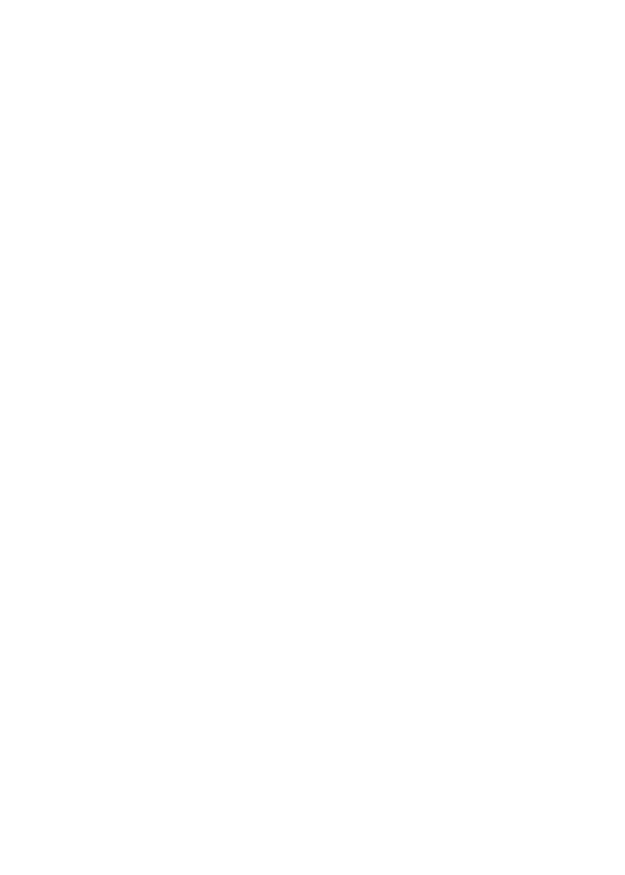

<IPython.core.display.Javascript object>


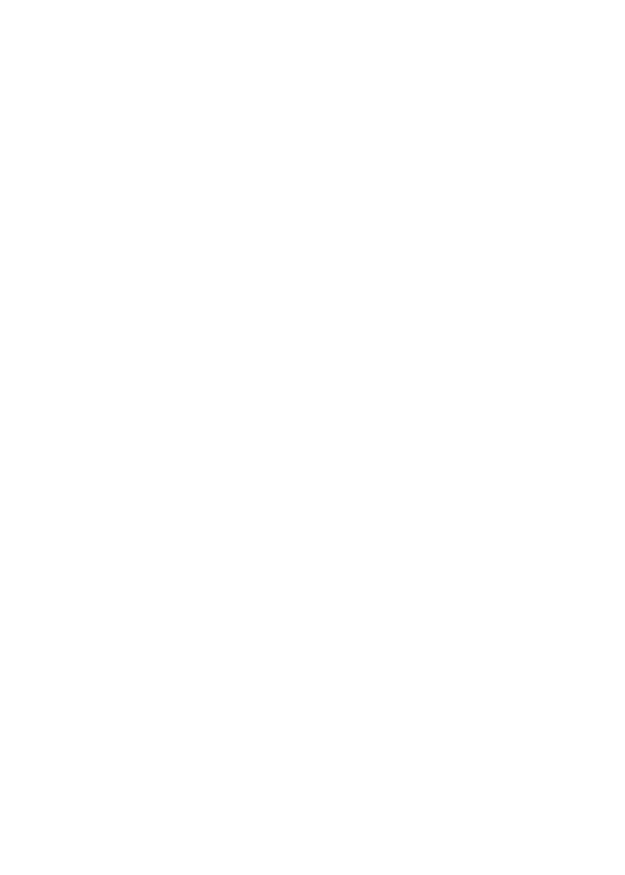

<IPython.core.display.Javascript object>


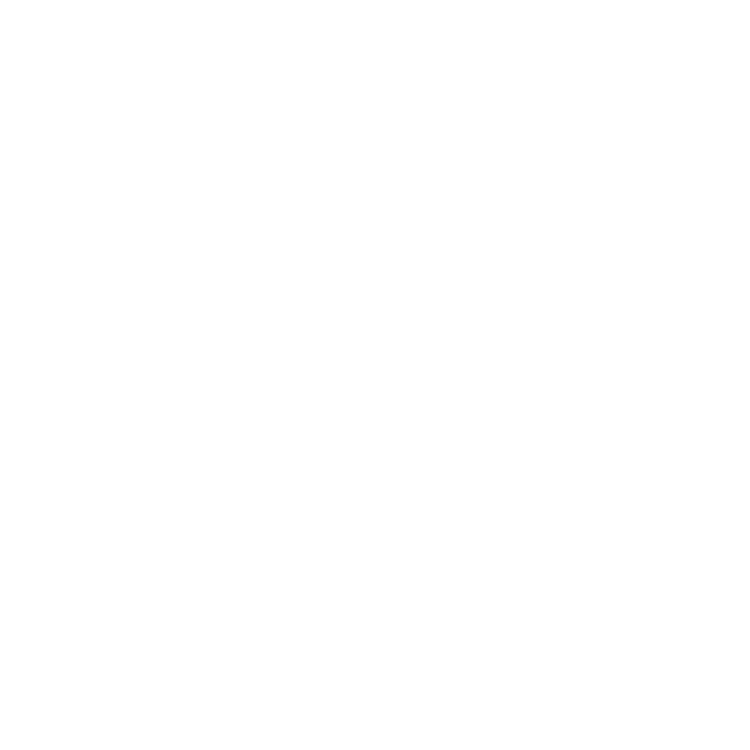

<IPython.core.display.Javascript object>


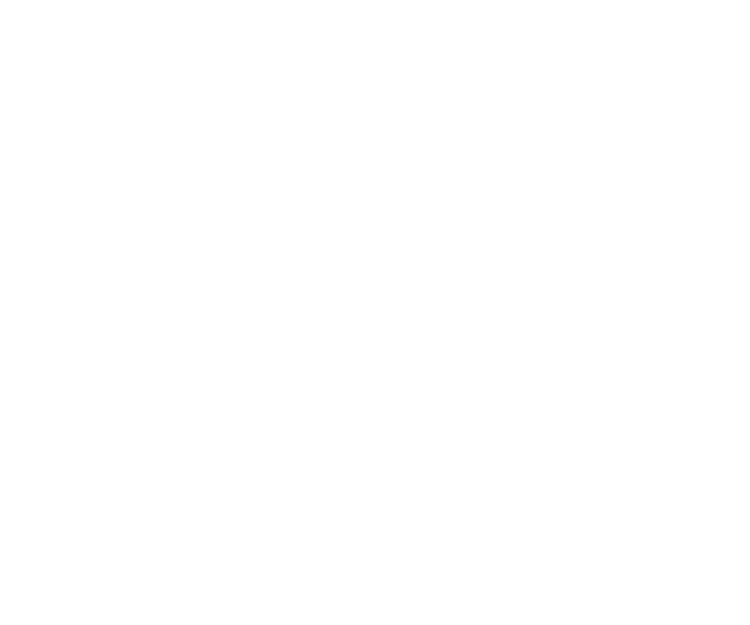

<IPython.core.display.Javascript object>


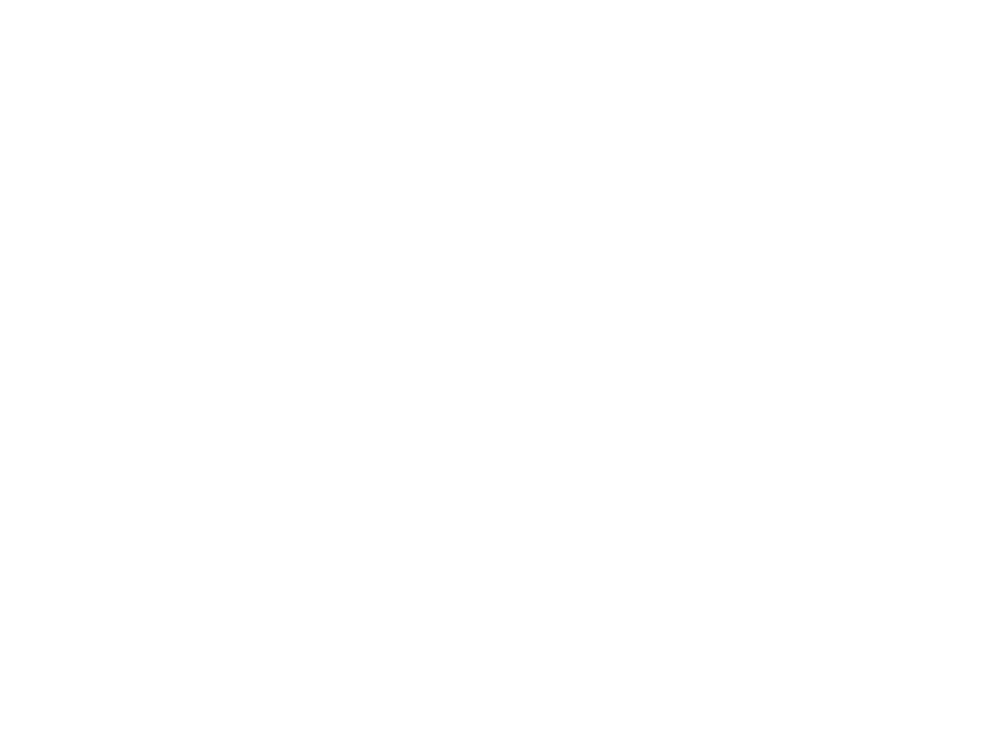

In [13]:
plt.ioff() 
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
plt.tight_layout()

x = np.linspace(lower_initial, upper_initial, length)
y = velocity(x)
ax1.plot(x, y, lw=3)
plt.show()

Sweet. So we can see that the curve representing $v(t)$ has a maximum when time is equal to 4. What does a time equal to 4 correspond to on the distance plot? Well, we can plot these side by side to make it very clear:

In [14]:
plt.ioff()                                              # Turn off interactive plotting
fig, (ax1, ax2) = plt.subplots(2, figsize=(5, 7))       # Create figure and axis object   
ax1.set_ylabel('Distance', fontsize=20)
ax2.set_ylabel('Velocity', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
plt.tight_layout()
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance
d2, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, distance
  vel = velocity(x)
  d.set_data(x, dist)                               # Set our data
  d2.set_data(x, vel)                               # Set our data

def init_distance():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 100) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 17) 
  return d, d2

""" Define steps and create animation object """
step = 0.05
steps = np.arange(0, 8, step)
html_video = HTML(FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
                                interval=50, blit=True).to_html5_video())
html_video

The velocity plot experiences a maximum at $t = 4$! This clearly corresponds to the point at which the distance plot has its maximum slope! We can also see that as the slope of the distance plot flattens out and gets closer to 0, the value of the velocity plot heads towards 0!

I encourage you to move the animation slider slowly and play around with the time $t$, so you can see how the velocity and distance relate. 

---

<br>
## 1.2.1 How do we go from Velocity to Distance?
At this point we have gone through, in great detail, how we can take a function that represents distance, and determine the velocity at any any given time $t$. Now, let's pretend for a moment that you did not know the distance function. Say you only knew the function that represented velocity:

$$v(t) = 8t - t^2$$

Now, what if I asked you to tell me how far we traveled in that period of time? How would you do it?

<br>
### 1.2.1.1 A simple example 
Let's say I told you you that I was traveling 4 meters per second for 8 seconds. Intuitively, it makes sense that:

$$distance = velocity * time = 4 \frac{m}{s} * 8 \; seconds = 32 \;meters $$

Now if we look at the plot of that exact scenario, how may you go about it from a geometric perspective?

<IPython.core.display.Javascript object>


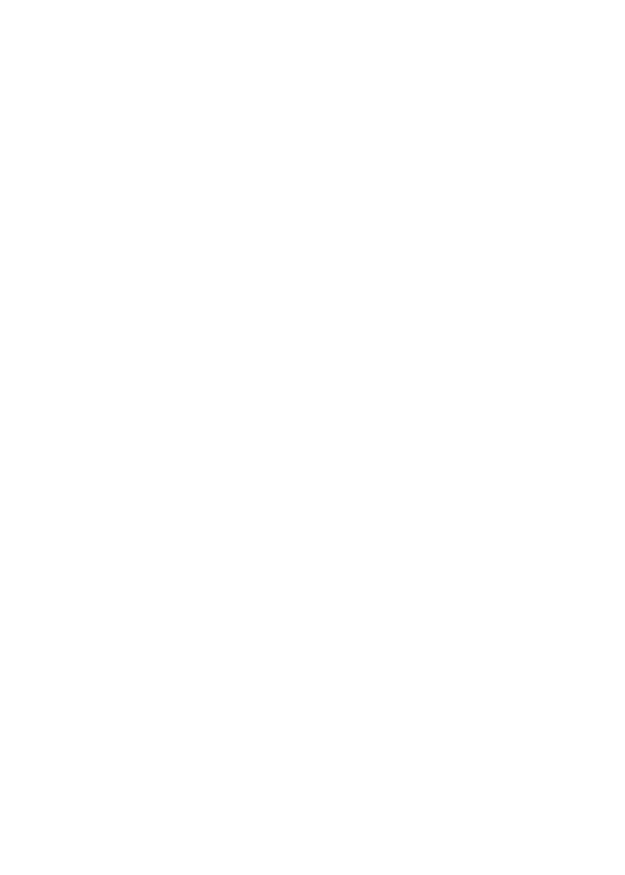

<IPython.core.display.Javascript object>


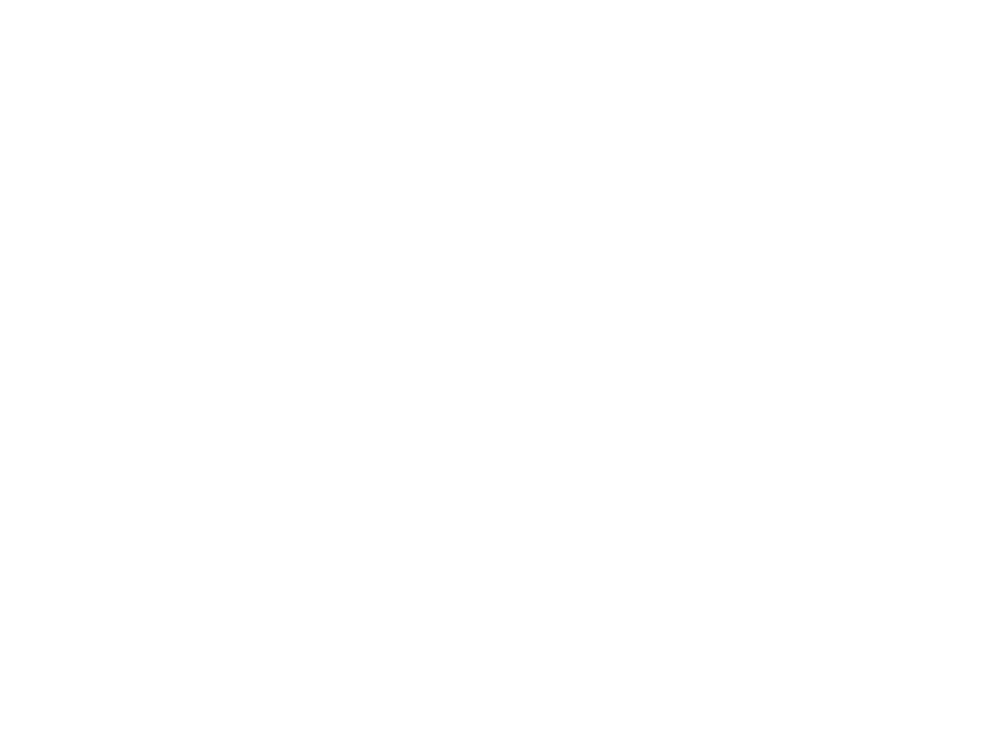

In [15]:
plt.ioff() 
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
plt.tight_layout()

x = np.linspace(lower_initial, upper_initial, length)
y = np.zeros(len(x)) + 4
ax1.plot(x, y, lw=3)
ax1.set_xlim(-1, 9)                               # Initialize x and y limits
ax1.set_ylim(0, 8) 
plt.show()

So we can see in plot above that we have a flat velocity curve that stays at 4 meters per second, over an interval of 8 seconds. Well, if we think about our intuitive calculation from above, we can again multiply the velocity times the time interval. Only now, velocity can be interpreted as a height and the time interval a width, making up a rectangle. This is better seen with a visualization:

<IPython.core.display.Javascript object>


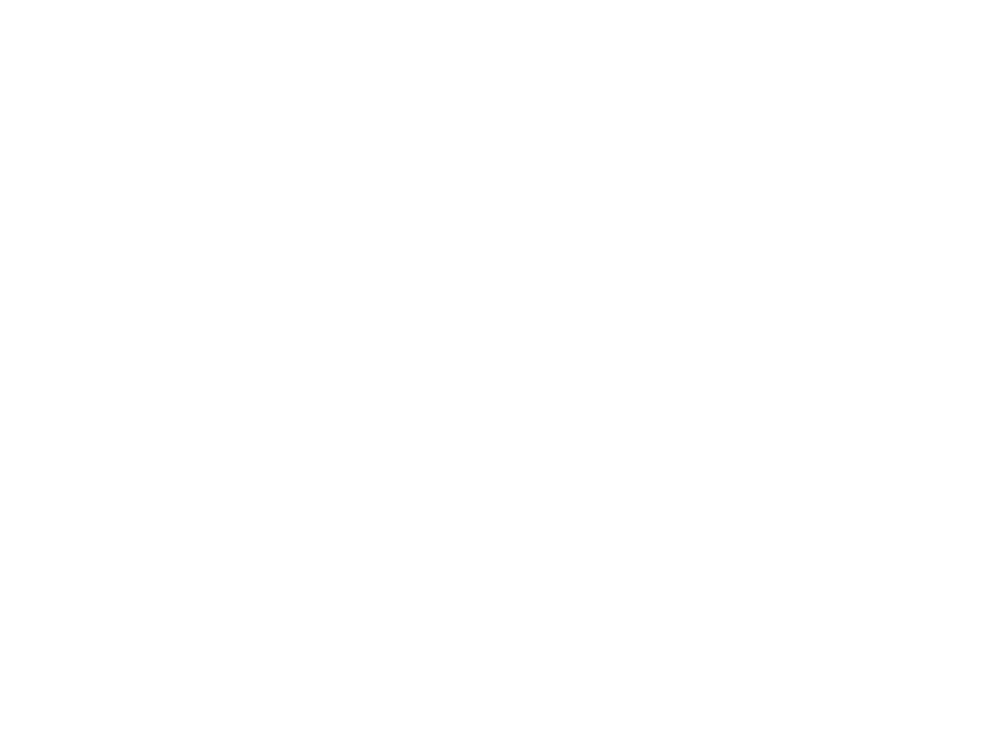

In [16]:
plt.ioff() 
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
plt.tight_layout()

x = np.linspace(lower_initial, upper_initial, length)
y = np.zeros(len(x)) + 4
ax1.plot(x, y, lw=3)
ax1.fill_between(x, y, color='lightgreen', alpha='0.5')
ax1.set_xlim(-1, 9)                               # Initialize x and y limits
ax1.set_ylim(0, 8) 
plt.show()

So, we can see above that the shaded green rectangle has a height of 4 meters per second, and a width of 8 seconds. If we recall the formula for area of a rectangle:

$$Height * width = Area$$

And if we now substitute our values from earlier:

$$velocity * time = distance$$

We find that:

$$velocity * time = distance = area \; under\;the\;curve$$

Now that still may seem rather contrived; why bother going through the work of finding the area under the curve when we can just use our initial method that seemed like much less work? Well, ponder this: we just looked at a situation where velocity was constant and did not change. How would we handle a situation where the velocity did change? 

If the change was **discrete**, meaning that it was not **continuous** and we could just jump from one velocity to the next, we would actually still be okay with out initial method. For example, say that I now tell you we travel 4 m/s for 3 seconds, then we immediately jump to 7 m/s and travel at the velocity for 3 second, and then instantaneously jump again to 2 m/s and stay there for 2 second. With our original method we can see:

$$4 \frac{m}{s} * 3s +7 \frac{m}{s} * 3s+2 \frac{m}{s} * 2s = 37 \; meters $$

Again, we can plot this situation and look at the area under the curve:

<IPython.core.display.Javascript object>


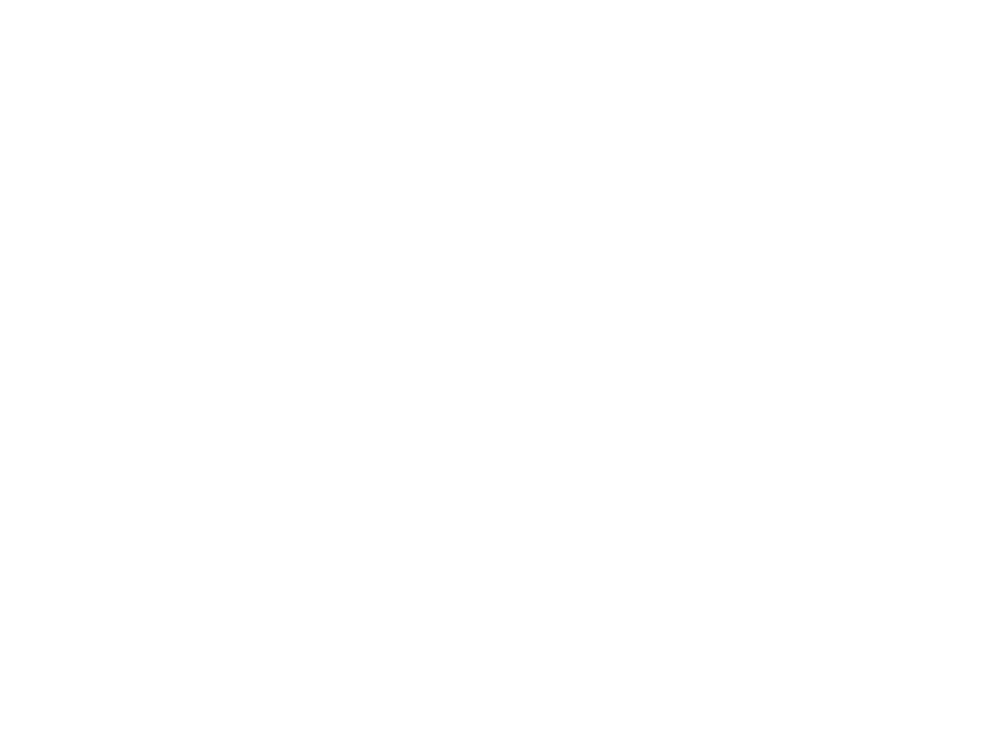

In [17]:
plt.ioff() 
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
plt.tight_layout()

x1 = np.linspace(0, 3, length)
y1 = np.zeros(len(x1)) + 4
x2 = np.linspace(3, 6, length)
y2 = np.zeros(len(x2)) + 7
x3 = np.linspace(6, 8, length)
y3 = np.zeros(len(x3)) + 2
ax1.plot(x1, y1, lw=3)
ax1.plot(x2, y2, lw=3)
ax1.plot(x3, y3, lw=3)
ax1.fill_between(x1, y1, color='lightgreen', alpha='0.5')
ax1.fill_between(x2, y2, color='yellow', alpha='0.5')
ax1.fill_between(x3, y3, color='orange', alpha='0.5')
ax1.set_xlim(-1, 9)                               # Initialize x and y limits
ax1.set_ylim(0, 8) 
plt.show()

If we again determine the area under the curve of the 3 above rectangles that will allow use to compute the total distance traveled, 37 meters! So, we still have not seen a reason for why we are going over all of this talk regarding area of rectangles and such. 

However, consider the following, our original velocity curve:

<IPython.core.display.Javascript object>


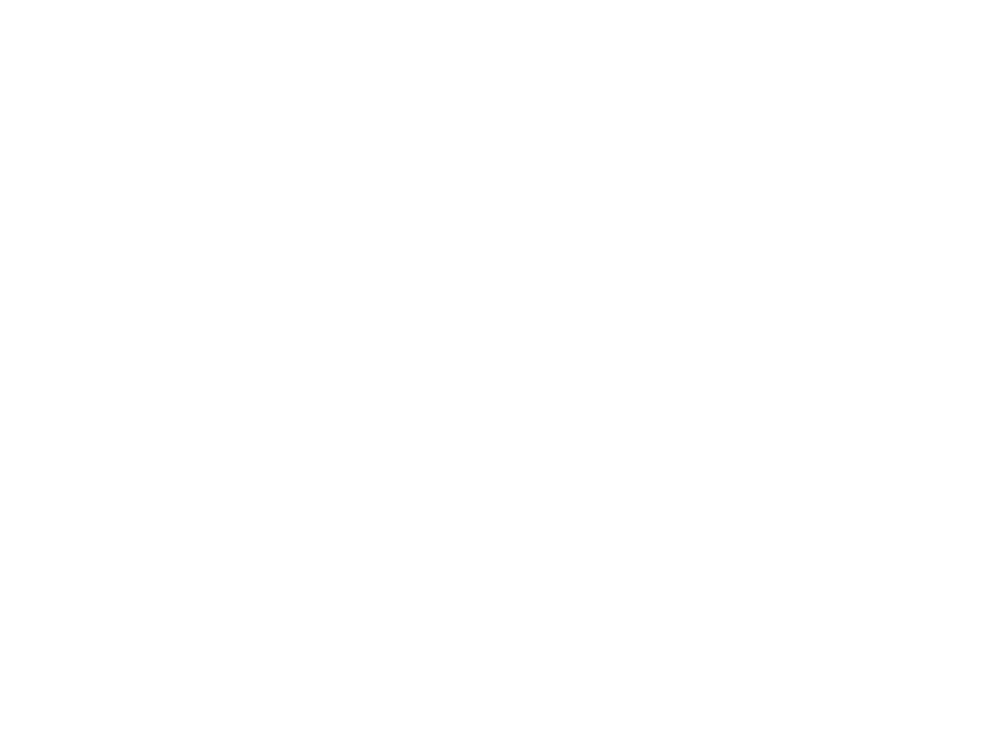

In [18]:
plt.ioff() 
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
plt.tight_layout()

x = np.linspace(lower_initial, upper_initial, length)
y = velocity(x)
ax1.plot(x, y, lw=3)
plt.show()

If I now asked you to tell me how far we traveled over this 8 second interval, how would you go about that? And that is where the concept of **area under the curve** that we have been discussing comes in. When our velocity function changes **nonlinearly** with its input, $t$, we can't simply calculate the the distance with our original method anymore; we need to determine a different way. 

Based on our earlier argument, we know that the total area under the velocity curve represents the distance traveled. So, we need to figure out how we find the area below the curve:

<IPython.core.display.Javascript object>


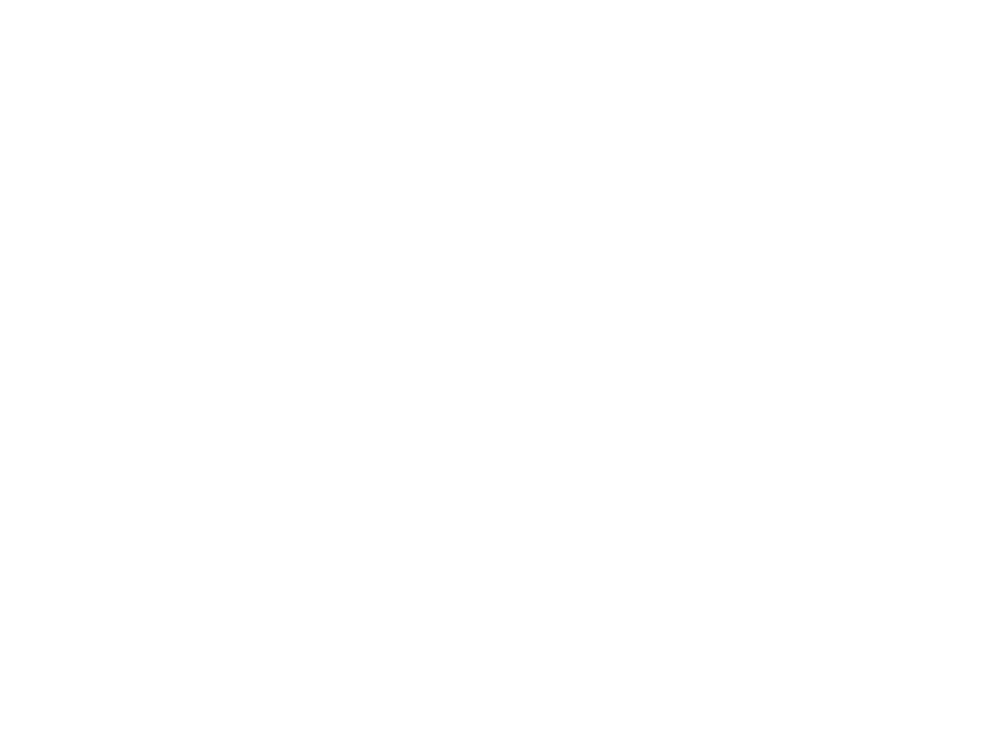

In [19]:
plt.ioff() 
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
plt.tight_layout()

x = np.linspace(lower_initial, upper_initial, length)
y = velocity(x)
ax1.plot(x, y, lw=3)
ax1.fill_between(x, y, color='lightgreen', alpha='0.5')
plt.show()

Determining the area under this velocity curve brings us back to our current idea:
> We know how to go from distance to velocity via a derivative. **How do we go from velocity back to distance?**

---

<br>
### 1.2.1.2 The Integral 
I want to preface by saying that often times this is the harder part for people to grasp, so don't worry if it doesn't click at first. Really let this concept sink in and try to understand the intuition behind what is happening. Too often do people try and start learning rules and rotely memorizing a process for a set of specific situations. Our goal is to build a rock solid understanding of the underlying phenomenon, and let that generalize to any new situation we may encounter!

Okay, with that out of the way, let's start with the first big idea here: The area under the velocity curve is **distance**:

$$distance = area \; under \; velocity \; curve$$

Now remember, we are pretending that we do not know the formula for distance at this point. So, how do we determine the total distance traveled based on the curve above? Well, we can start by saying that a decent approximation would be to break the area down into smaller and smaller rectangles, like so:

<IPython.core.display.Javascript object>


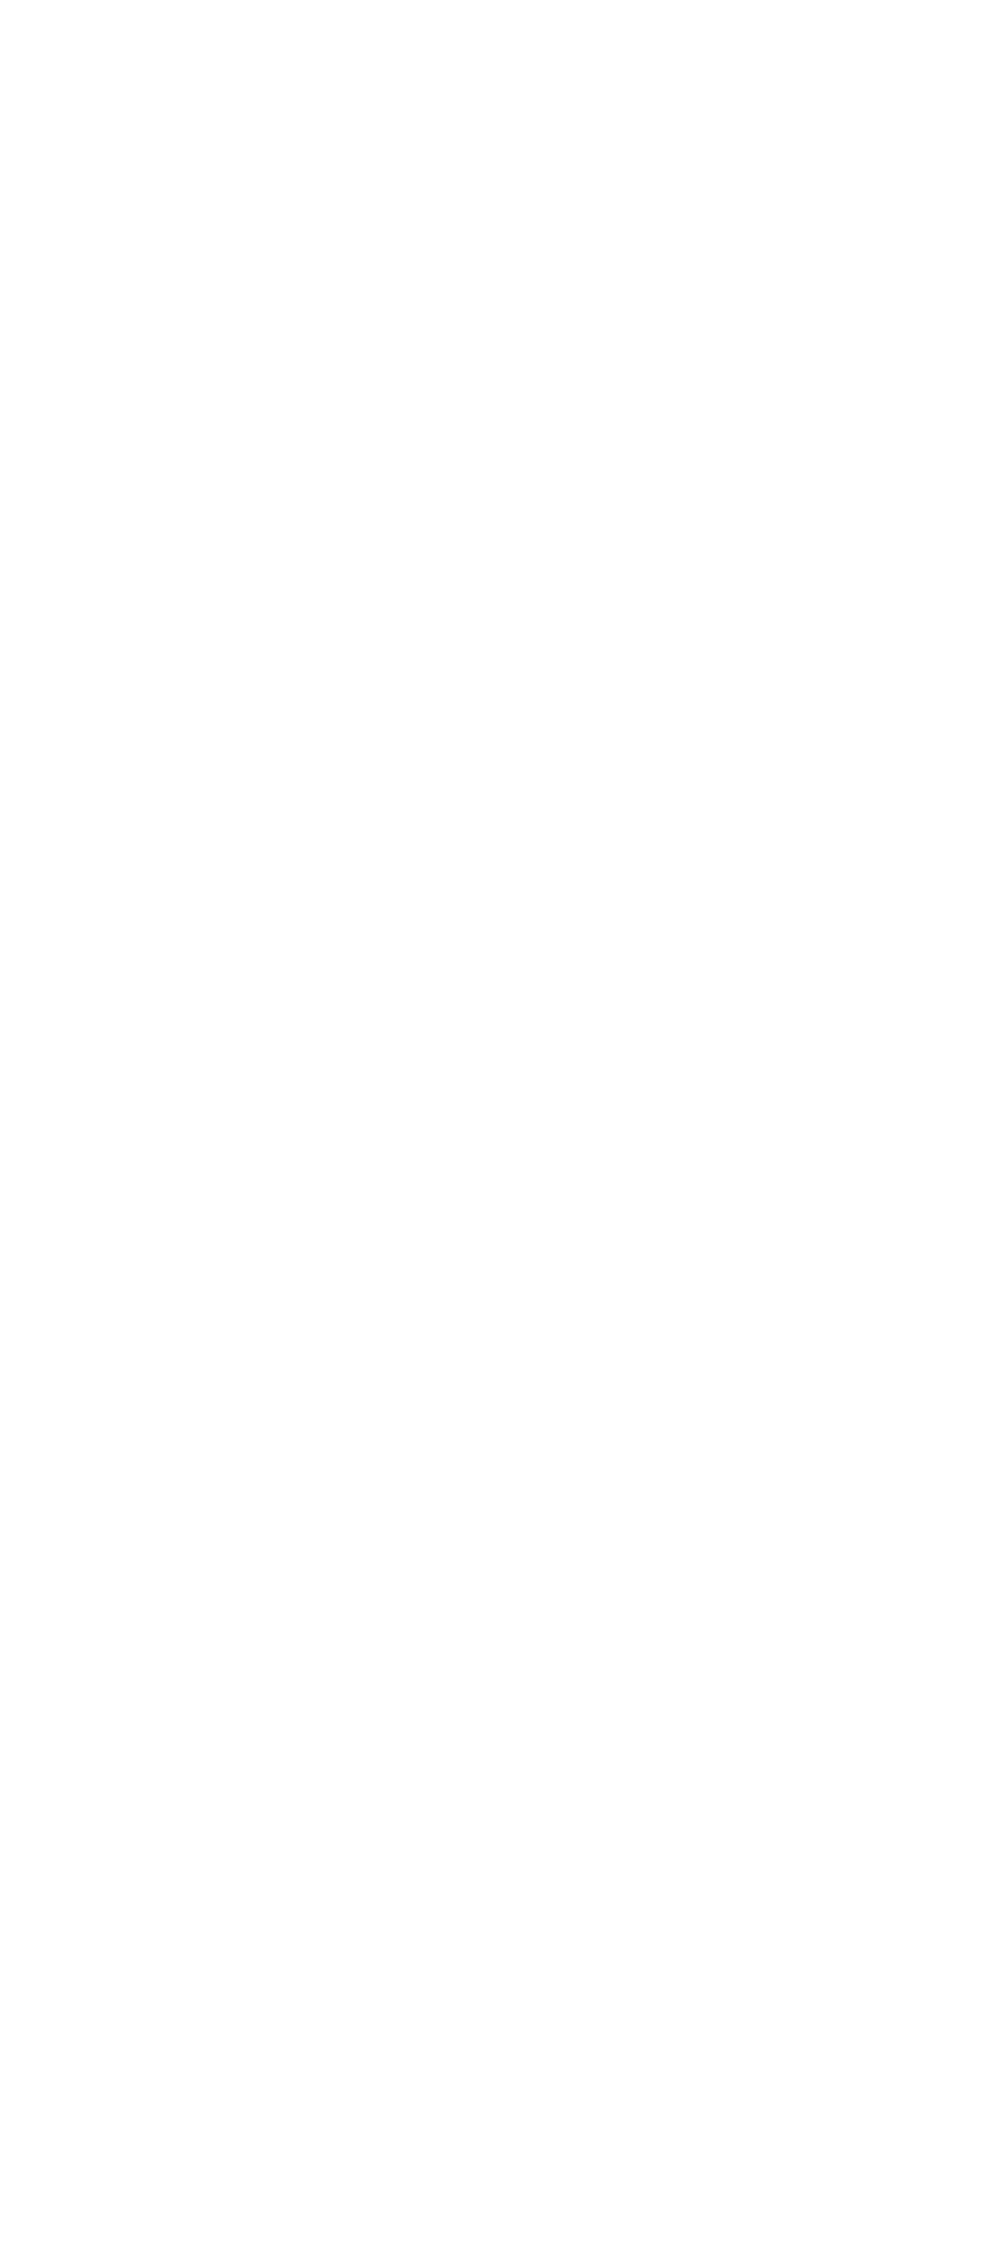

In [20]:
plt.ioff() 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 18))     # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
ax2.set_ylabel('Velocity', fontsize=20)
ax3.set_ylabel('Velocity', fontsize=20)
plt.tight_layout()

x = np.linspace(lower_initial, upper_initial, length)
y = velocity(x)
ax1.plot(x, y, lw=3)
ax1.fill_between(x, y, color='lightgreen', alpha='0.5')
ax1.set_ylim(0, 17) 
ax2.plot(x, y, lw=3)
ax2.fill_between(x, y, color='lightgreen', alpha='0.5')
ax2.set_ylim(0, 17) 
ax3.plot(x, y, lw=3)
ax3.fill_between(x, y, color='lightgreen', alpha='0.5')
ax3.set_ylim(0, 17) 
for i in range (0,8):
  y = velocity(i)/17
  ax1.axvline(x=i, ymax=y, color="lightblue") 
for i in range (0,16):
  y = velocity(i/2)/17
  ax2.axvline(x=i/2, ymax=y, color="lightblue") 
for i in range (0,32):
  y = velocity(i/4)/17
  ax3.axvline(x=i/4, ymax=y, color="lightblue") 
  
  
plt.show()

And as we continue to break down the area into smaller and smaller intervals, which we can treat as rectangles, we can then sum up all of the rectangles to get an approximation of the total area under the curve, our distance. In the form of an equation that looks like:

$$ Approximate \; area \; under\;velocity\;curve = distance= \sum_0^8 area\;of\;each\;rectangle  $$

Now, just as we did when going from the distance to velocity, I want us to again imagine shrinking the size of that interval $t$ until it begins to approach 0. We would be summing up all of those tiny rectangles, as the width of each rectangle approaches 0. There is a special symbol for this, and you can just think of it as a **continuous summation**:

$$distance = s(t)= \int_0^8 v(t)$$

You may be thinking "Okay, great. How exactly is this going to help us determine what our distance is?"

Well, I want to convince you by using an analogy to our example regarding the derivative of distance. When we were looking at our distance function, we were able to say that the slope at any given time would be equal to the velocity at that time, $t$. Now, we have the velocity function and we have said that the area under the curve is equal to distance. If we look at **how the area under the velocity curve changes as a function of time**, we are looking at how distance changes as a function of time. We know that distance changing as a function of time is equal to velocity, which means that the rate at which the area under the curve changes is velocity! An animation may help make this more concrete:

In [21]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(7, 7))            # Create figure and axis object  
ax1.set_ylabel('Velocity', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
ax2.set_ylabel('Distance', fontsize=20)
v, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for velocity
d, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_v_d(upper_bound):
  x = np.linspace(0, upper_bound, length)
  vel = velocity(x)                                # Getting y-value, velocity
  v.set_data(x, vel)                               # Set our data
  
  collection = ax1.fill_between(x, vel, color='lightgreen', alpha='0.1')
  path = collection.get_paths()[0]
  path.vertices[:, 1] 
  
  dist = distance(x)
  d.set_data(x, dist)    

def init_v_d():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 17) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 90) 
  
  return v, d

""" Define steps and create animation object """
step = 0.05      
steps = np.arange(0, 8.1, step)
html_video = HTML(FuncAnimation(fig, animate_v_d, steps, init_func=init_v_d,
                                interval=50, blit=True).to_html5_video())
html_video

As I always, mess around with the slider in order to see how the area under the velocity curve changes at different values of $t$. When $t = 0.5$ we can see that if we nudge it to $t = 0.6$ we little additional area is added. However, when $t = 3.9$ a nudge to $t = 4.0$ leads to a much greater increase in area, aka **distance**.

As you move the slider, the amount of area shaded in green represents the total distance the car has traveled after $t$ seconds. This area is a function of $t$, meaning that as we move the slider the area (green shaded region) will change based on it's value. If we were to frame this as an equation:

$$distance = s(t) = \int_0^t v(t)dt$$

Now, this is the big mental leap we need. I want you to ask yourself:
> "What is the derivative of that function? "

It may seem initially confusing since we aren't quite sure how to take the derivative of an integral yet. However, forget about the right hand side of the equation for a moment. We are asking: What is the derivative of a function that represents distance? Well, intuitively we know that that is velocity! If we think about how the area changes as we increase $t$, we know that a small nudge in $t$, $dt$, would case the area under the curve to increase by $ds(t)$, a tiny additional sliver of area. The height of that sliver would be $v(t)$. So we know that the area of that sliver would be $dt$ times $v(t)$! 

$$ds(t) = v(t)dt$$

Let's get a deeper look an hopefully clear things up with a visualization.

<IPython.core.display.Javascript object>


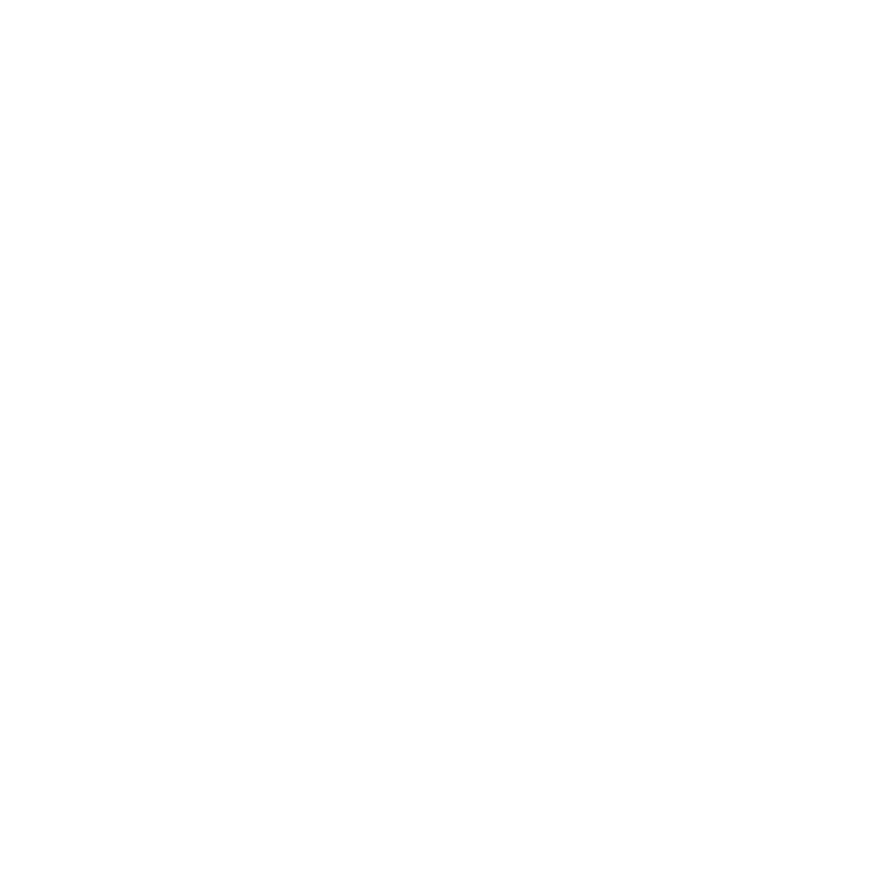

<IPython.core.display.Javascript object>


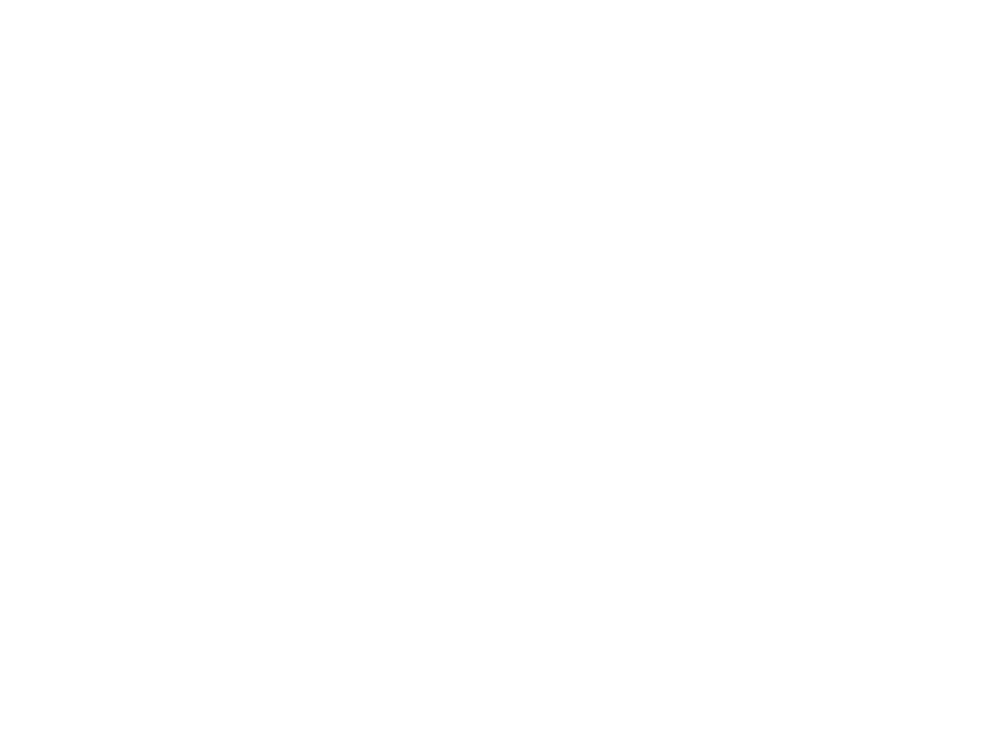

In [22]:
plt.ioff() 
fig, (ax1) = plt.subplots(1, figsize=(8, 6))     # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)

plt.tight_layout()

x = np.linspace(lower_initial, upper_initial, length)
y = velocity(x)
ax1.plot(x, y, lw=3)
x1 = np.linspace(lower_initial, 5, length)
y1 = velocity(x1)
dx = np.linspace(5, 5.1, length)
y_dx = velocity(dx)
ax1.fill_between(x1, y1, color='lightgreen', alpha='0.5')
ax1.fill_between(dx, y_dx, color='royalblue', alpha='0.5')
ax1.set_ylim(0, 17) 

plt.show()

In the above plot, we can see that the green area represents the total distance traveled up to time $t = 5$. We then nudge our value for $t$ slightly to the right - we can call this change in time $dt$. This small nudge $dt$ caused our area under the curve (distance!) to increase by an amount $ds(t)$, which is the shaded blue region. As $dt$ approaches 0, the blue region (our change in area/distnace) can be approximated as a rectangle, and the height of that rectangle is...$v(t)$! So, an area of a rectangnle is simple width times height, meaning we can determine:

$$ds(t) = v(t)dt$$

Before we move on to the last step, we can quickly look at a visual to see how this area really correponds to distance:

<IPython.core.display.Javascript object>


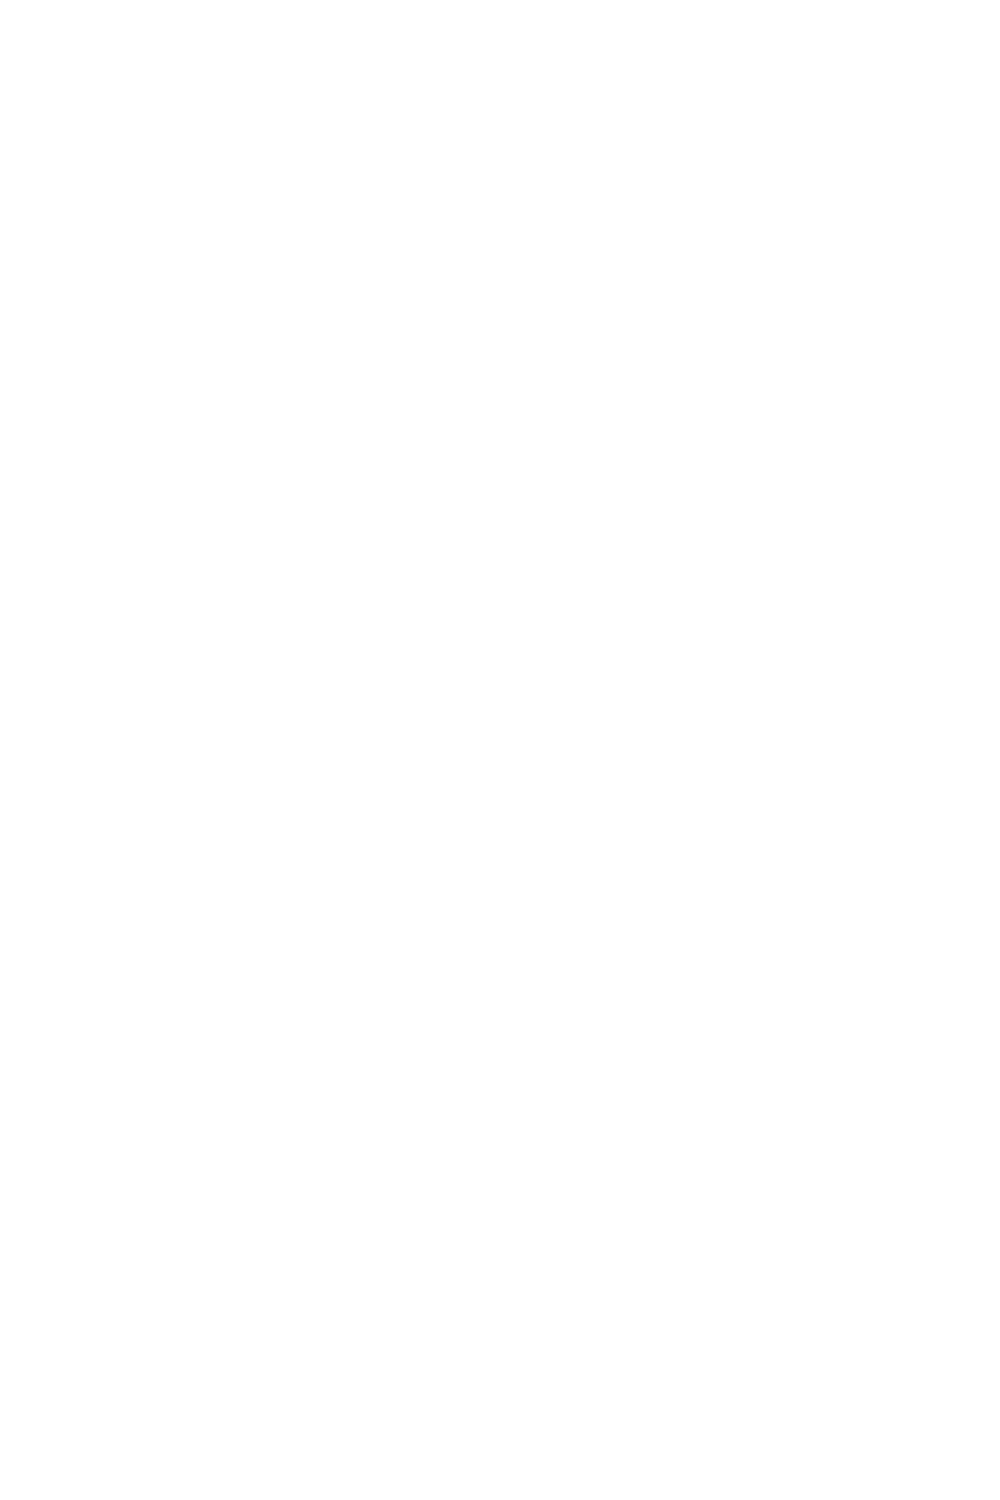

In [23]:
plt.ioff() 
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 12))     # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
ax2.set_ylabel('Distance', fontsize=20)

plt.tight_layout()

x = np.linspace(lower_initial, 5.1, length)

y = velocity(x)

ax1.plot(x, y, lw=3)
y1 = velocity(x1)
x1 = np.linspace(lower_initial, 5, length)
dx = np.linspace(5, 5.1, length)

y_dx = velocity(dx)

ax1.fill_between(x1, y1, color='lightgreen', alpha='0.5')
ax1.fill_between(dx, y_dx, color='royalblue', alpha='0.5')
ax1.set_ylim(0, 17) 

y_dist_x1 = distance(x1) 
y_dist_dx = distance(dx)
ax2.plot(x1, y_dist_x1, lw=3, color="lightgreen")
ax2.plot(dx, y_dist_dx, lw=3, color="royalblue")

plt.show()

The area under the velocity curve shaded in green corresponds to the green curve in the distance plot. The sliver of added area in under the velocity curve corresponds to the blue portion of the curve in the distance plot. 

Now we can finally move on to the next step! We can quickly recap what we just determined. The area under the velocity curve at a certain time $t$ is defined as:

$$Area \; under \; velocity \; curve= distance  = s(t) = \int_0^t v(t)dt$$

We then asked what is the derivative of that function? This means we are asking "how does the area under the velocity curve change as we change the value of $t$"? We determined that a small change in area under the curve, $ds(t)$ is equivalent to $v(t)$ times $dt$:

$$ds(t) = v(t)dt$$

We can also say that the derivative of the area under the curve function (never forget that is representing distance!) is equal to the value of the velocity function at whatever time we started on:

$$\frac{ds(t)}{dt} = v(t)$$

This a general principle that is applied to many functions! So, if our velocity function is:

$$v(t) = 8t - t^2$$ 

What should $s(t)$, our distance be:

$$\frac{d(???)}{dt} = v(t)= 8t - t^2 $$

In other words, we are asking what function has a derivative that is equivalent to:

$$8t - t^2 $$

This is where the concept of the **antiderivative** comes into play! 

---

<br>
### 1.2.1.3 The Antiderivative 
We are now trying to find a function, $s(t)$, that when derived yields: 

$$\frac{ds(t)}{dt} = 8t - t^2 $$

Well, we know that when derived $4t^2$ would yield $8t$, and $- \frac{1}{3}t^3$ would yield $-t^2$. This means that the antiderivative of our function is:

$$antiderivative \; of \; velocity = 4t^2 - \frac{1}{3}t^3$$ 

Notice that I did not say that the antiderivative of velocity was equal to distance in the above equation. This is because there is one thing missing before we can say that the above equation is equal to distance, $s(t)$. We could technically add any constant to the above function, and its derivative will still be $8t - t^2$. This is because the derivative of a constant always just goes to 0. This is because the constant will simply move the graph up and down, while not effecting it's slope at all. This means that in reality there are actually infinitely many anti derivative functions, and everyone of them has the form: 

$$4t^2 - \frac{1}{3}t^3 + C$$

So how do we find the original function $s(t)$ if there are infinitely many antiderivatives? Well, there is one piece of information we have not made use of yet. The **lower bound of the integral**.

Think about this for a second and look back at out animation representing the area under the velocity curve. When $t$ is equal to 0, the shaded green region drops to 0 as well. This means that when $t$ is 0:

$$\int_0^0 (8t - t^2)dt = 0$$

So in order to chose what function to add to our antiderivative expression, you subtract off the value of the antiderivative at the lower bound, in this case 0. 

$$\int_0^t(8t - t^2)dt = (4t^2 - \frac{1}{3}t^3) - (4*0^2 - \frac{1}{3}*0^3)$$

Keep in mind that the constant we are really trying to find is just the intercept of the distance function. In this case the intercept of the distance function is 0, which is in line with our math above since the antiderivative evalued at 0 is 0. 

---

<br>
## 1.3 The Fundamental Theorem
Now a more common example of something that we may be asked to determine is what is the distance that we travel between $t= 1$ and $t =7$ seconds. This can be visually seen below:

<IPython.core.display.Javascript object>


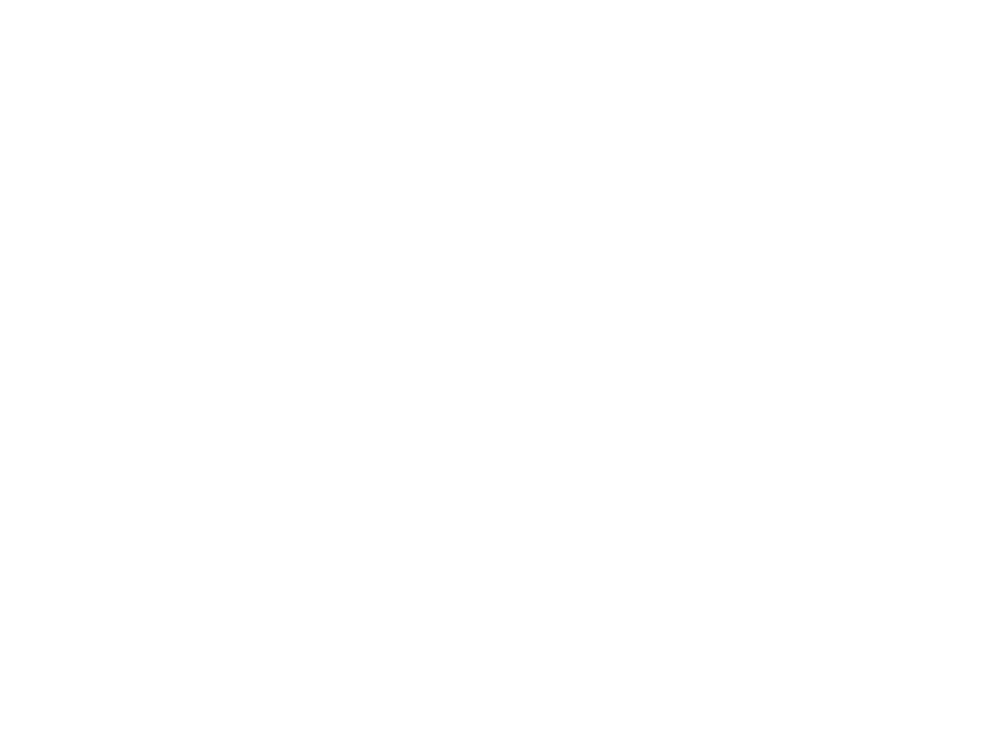

In [24]:
plt.ioff() 
fig, (ax1) = plt.subplots(1, figsize=(8, 6))     # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)

plt.tight_layout()

x = np.linspace(lower_initial, 8, length)
y = velocity(x)
ax1.plot(x, y, lw=3)

x1 = np.linspace(1, 7, length)
y1 = velocity(x1)


ax1.fill_between(x1, y1, color='lightgreen', alpha='0.5')
ax1.set_ylim(0, 17) 


plt.show()

So, in the plot above the green shaded area represents the distance traveled between 1 second and 7 seconds. So, in this case you would evaluate the antiderivative that we found at the top bound (which represents the distnace function at time $t = 7 \; seconds$ plus some constant, and subtract the antiderivative evaluated at the lower bound (which represents the distance function at time $t = 1 \; second$):

$$\int_1^7 (8t - t^2)dt = \Big(4(7)^2 - \frac{1}{3}(7)^3\Big) - \Big(4(1)^2 - \frac{1}{3}(1)^3\Big)$$

The nice thing in this situation is that even if the antiderivative had a constnt $C$ associated with it, it would be the same for both the upper and lower bound evalutation and hence cancel, so we don't need to worry about it in this case. 

So, if we now try and generalize this we can say that any time you want to integrate some function $f(x)$:

$$\int_a^b f(x)dx$$ 

Which we can think of as adding up value of $f(x)$ times $dx$ for inputs in a certain range, and asking "what does that sum approach as dx approaches 0"? The first step to evaluating that integral is to find an **antiderivative**, which is some other function $F(x)$, whose derivative is the function we are trying to integrate:

$$\frac{dF(x)}{dx} = f(x)$$

Then, this integral is equal to the antiderivative evaluated at the upper bound minus the antiderivative evaluated at the lower bound. 

$$\int_a^b f(x)dx = F(b) - F(a)$$

This fact that we just described is the **Fundamental Theorem of Calculus**. Pretty cool right? Now, something that may seem a little crazy is that when all is said and done we only need to use two inputs, the upper and lower bound, to determine the total area under the curve. Well, if you think about it in terms of our original example, area under the velocity curve was distance. If we integrate and find the function that represents distance, if we want to know the distance traveled from $t = 1$ second to $t = 7$ seconds we simply need to plug 7 in to the distance function, and subtract the value of 1 plugged in to the distance function. That is because in our original example $f(x)$ was analogous to $v(t)$, and $F(x)$ was analogous to $s(t)$, our distance. 

In [25]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>